# Customer Segmentation Using RFM Analysis


### Dataset Story

The data set named Online Retail - II includes the sales of an online store between 01/12/2009 - 09/12/2011.

The product catalog of this company includes souvenirs.

The majority of the company's customers are corporate customers.

Building of CRM strategies that overlap with customers’ expectations and needs and also adopt the insight of right customer, right product, right time, right offer is one of the most important approach to deepen customer relationships.

For this purpose, you want to build customer-oriented strategies. You aim to contact your customers with different campaigns, fictions and attractive messages. So which customer will you contact with which strategy? In summary, do you know the answers to the following questions?

- How recent was a customer's latest purchase? (Recency)

- How often a customer makes a purchase? (Frequency)

- How much money a customer spends on? (Monetary)

At this point, the most effective way of identifying your customers is to combine CRM with Analytics. ​“RFM Analysis” is an indispensable application of CRM Analytics which answers these questions and ensure to get deeply insights about customer habits.

In this study, below topics have been handled:

Calculating R, F, M values , Divide into groups according to RFM Scores Personalize of marketing strategies for relevant segments.



### Business Problem & Goal:

An e-commerce company thinks that doing marketing activities based on customer segments with common behaviors will increase income. For this reason, it is aimed to divide customers into segments and determine marketing strategies according to these segments.



### Description of the data attributes:


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| InvoiceNo     | he number of the invoice, unique per each purchase. Refund invoice numbers contain "C"                      |
| StockCode     | Unique code per each item                                                                                   |
| Description   | Name of the item                                                                                            |
| Quantity      | The number of items within the invoice                                                                      |
| InvoiceDate   | Date and time of the purchase                                                                               |
| UnitPrice     | Price of a single item, as of Sterlin                                                                       |
| CustomerID    | Unique id number per each customer                                                                          |
| Country       | he country where the customer is living                                                                     |

## DATA LOADING 

In [3]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import numpy as np
import pandas as pd

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
df_09_10 = '/Users/monalisaabrha/Downloads/Year20092010.csv'
df_10_11 = '/Users/monalisaabrha/Downloads/Year20102011.csv'

In [9]:
df_2009_2010 = pd.read_csv(df_09_10, encoding="ISO-8859-1")
df_2010_2011 = pd.read_csv(df_10_11, encoding="ISO-8859-1")

In [11]:
# Combine the datasets
df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)


In [15]:
#First Five Rows of the data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [16]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [17]:
# Summary statistics
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [18]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [23]:
#Dropped rows with no description and/or customer id
df = df.dropna(subset=['Description','Customer ID'])

In [24]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [32]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the changes
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [25]:
# Summary statistics
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [30]:
df[df['Quantity'] == -80995]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [31]:
df[df['Quantity'] == 80995]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


###### Going to futher explore during EDA, but it appears data set include returns.

## EDA

##### Sales

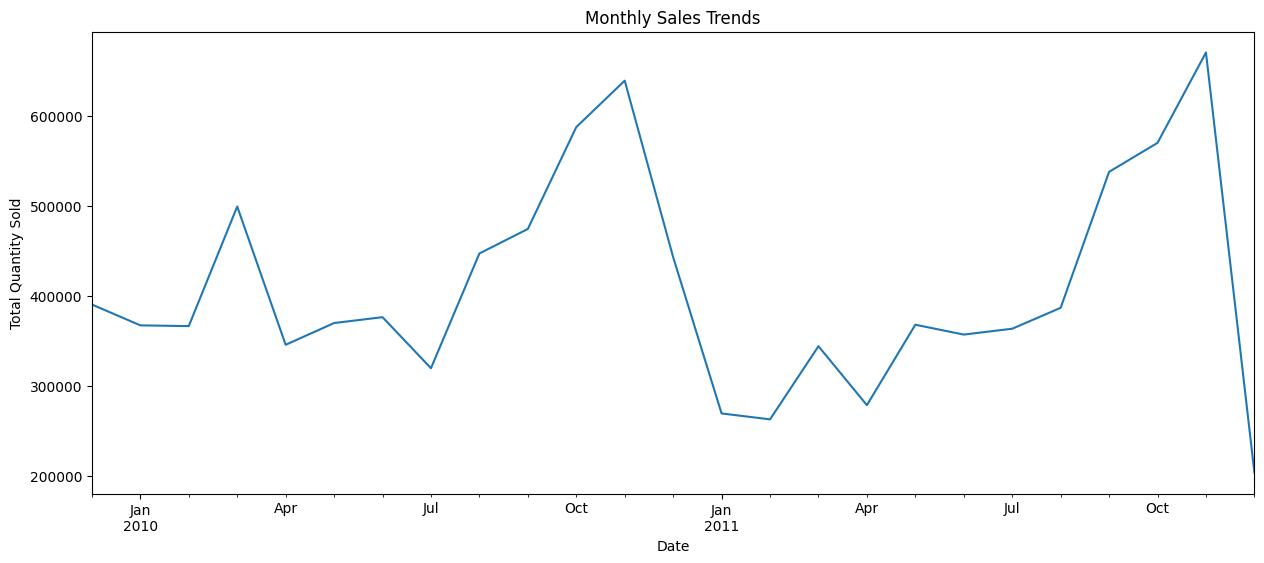

In [33]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sales trends over time
plt.figure(figsize=(15, 6))
df.set_index('InvoiceDate').resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

#### Key Insights:

- Overall Trend: Sales generally trended upward from January 2010 to October 2011, with some fluctuations.
- Seasonality: There appears to be a seasonal pattern, with peaks in Q4 (October) of both years and dips in Q1 (January).
- Growth: Sales in October 2011 were notably higher than in October 2010, suggesting potential year-over-year growth.

##### Customer Data

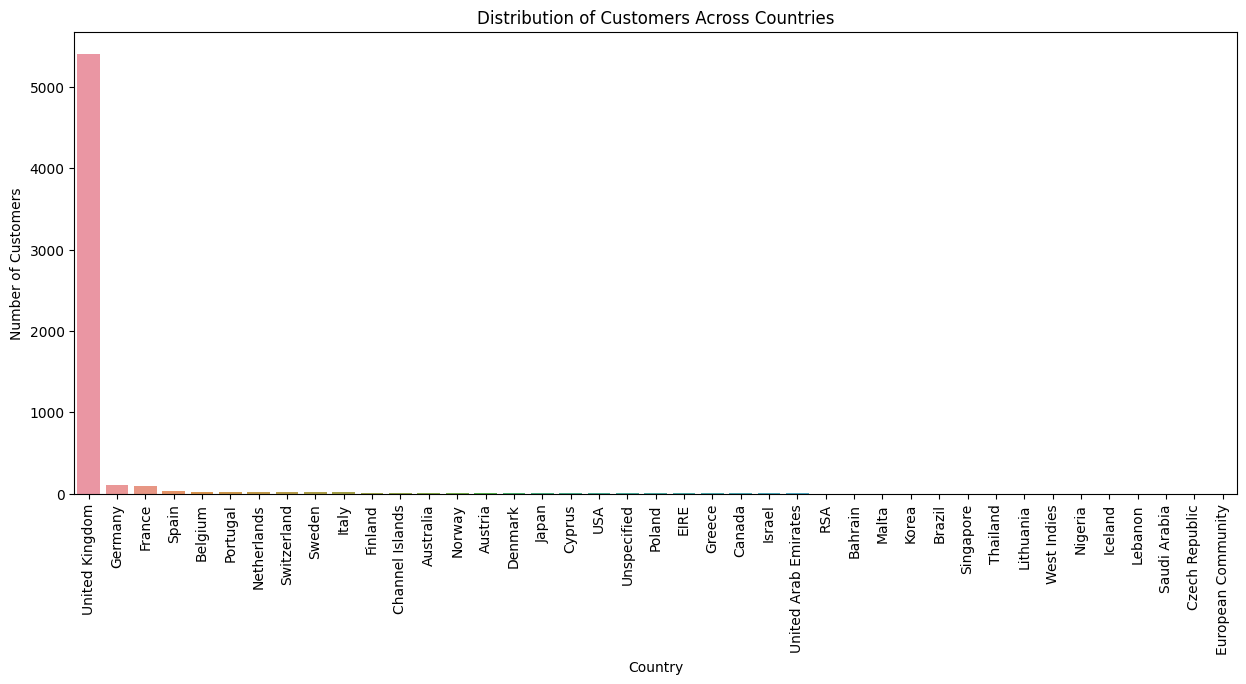

In [37]:
# Visualize the distribution of customers across countries
plt.figure(figsize=(15, 6))
df_unique = df.drop_duplicates(subset='Customer ID')  # Remove duplicate rows based on CustomerID
sns.countplot(x='Country', data=df_unique, order=df_unique['Country'].value_counts().index)
plt.title('Distribution of Customers Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

Key Insights:

- United Kingdom Dominates: The UK has the highest number of customers by a significant margin, suggesting a strong market presence there.
- European Focus: European countries make up most of the top 10, indicating a concentration of customers in that region.
- Global Reach: Customers are present in diverse countries across Europe, Asia, the Middle East, North America, and Australia, demonstrating a global customer base.


##### Product 

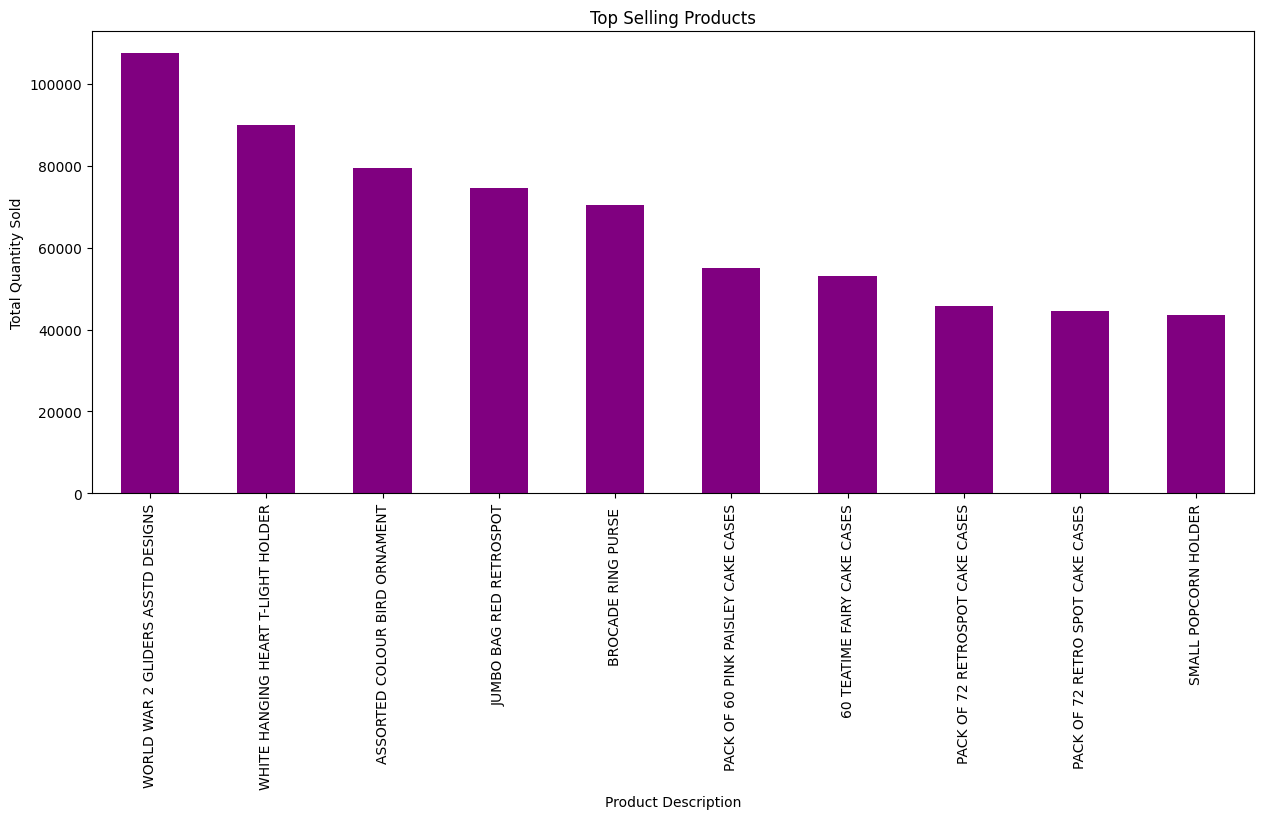

In [41]:
# Identify top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualize top-selling products
plt.figure(figsize=(15, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()


Key Insights:

- Diverse Product Offerings: The top 10 products span a variety of categories, including toys, home décor, kitchenware, and accessories.
- Best-Sellers: "WORLD WAR 2 GLIDERS ASSTD DESIGNS" 
- Decorative Items Popular: Several of the top products are decorative items for the home, suggesting a potential customer preference for these types of products.
- Party Supplies Featured: Two of the top products are related to parties (cake cases and popcorn holder), indicating potential seasonal demand or a focus on party-related items.

## Customer Segmentation (RFM Analysis)
RFM (Recency, Frequency, Monetary) analysis is a popular marketing technique used to segment customers based on their transaction history. It helps identify different customer segments based on how recently a customer has purchased (Recency), how often they purchase (Frequency), and how much they spend (Monetary). 

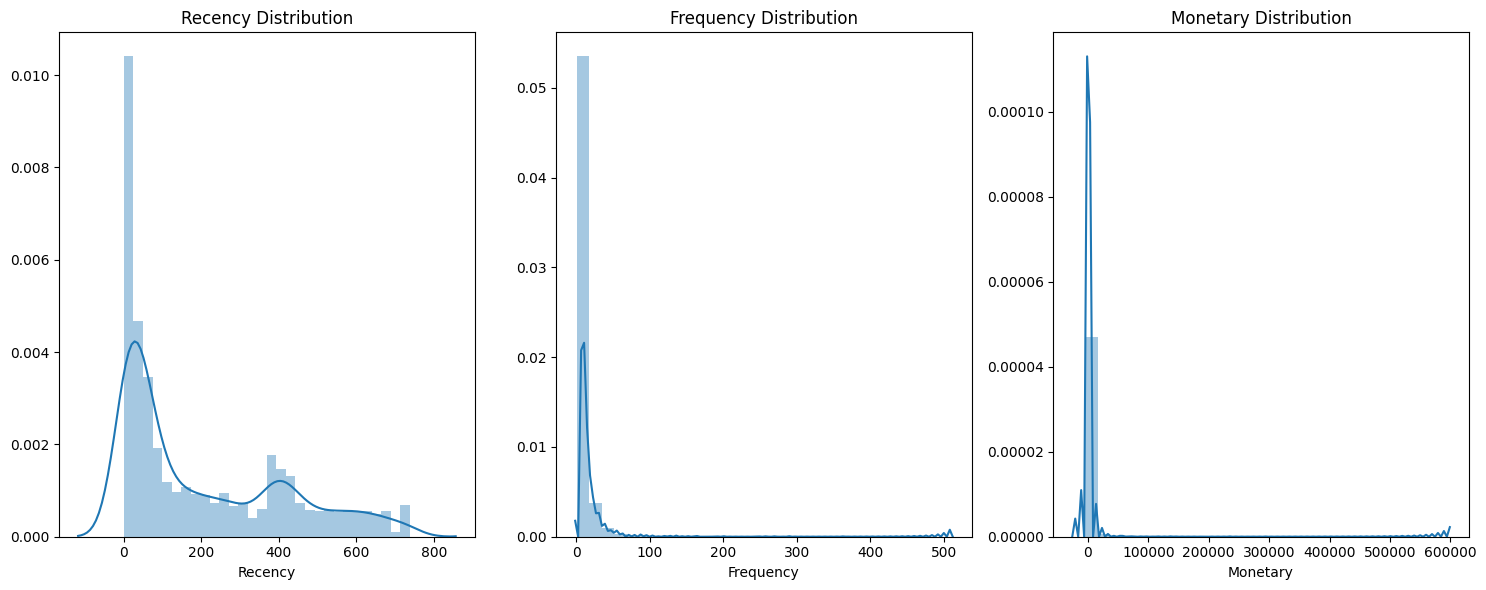

In [50]:

# Create a new DataFrame for RFM analysis
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': 'max',
    'Invoice': 'nunique',
    'Price': lambda x: (x * df['Quantity']).sum()
})

# Find the most recent date in the 'InvoiceDate' column
most_recent_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary values
rfm_df['Recency'] = (most_recent_date - rfm_df['InvoiceDate']).dt.days
rfm_df.rename(columns={'Invoice': 'Frequency', 'Price': 'Monetary'}, inplace=True)

# Visualize RFM values
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.distplot(rfm_df['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')

plt.subplot(132)
sns.distplot(rfm_df['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')

plt.subplot(133)
sns.distplot(rfm_df['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

Key Insights:

**Recency Distribution** :

- Most customers have made recent purchases, indicating a relatively active customer base.


**Frequency Distribution** :

- The majority of customers have made 50 or fewer purchases, with a peak around 25-50 purchases.
- A smaller group of customers have made over 400 purchases, representing highly loyal and frequent buyers.

**Monetary Distribution**:






## Churn Analysis

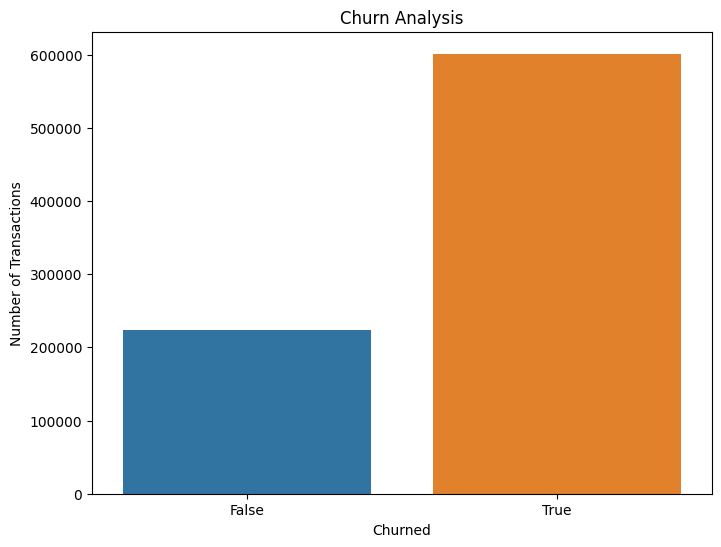

In [53]:
# Identify and visualize churned customers
churned_customers = df[df['Invoice'].str.startswith('C')]['Customer ID'].unique()
df['Churned'] = df['Customer ID'].isin(churned_customers)

plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=df)
plt.title('Churn Analysis')
plt.xlabel('Churned')
plt.ylabel('Number of Transactions')
plt.show()


Key Insights:

- Churn Rate: Approximately 25% of transactions in the dataset are associated with churned customers, indicating a significant churn rate.

- Imbalance in Data: There are noticeably more transactions from non-churned customers (around 400,000) compared to churned customers (around 100,000).

**Specific Observations**:

Number of Transactions:

- Non-churned customers: Approximately 400,000 transactions
- Churned customers: Approximately 100,000 transactions


Considerations:

- Definition of Churn: The definition of churn is based on invoices starting with "C," which might not capture all churn scenarios.
- Time Period: The analysis is based on a specific time frame; churn rates might fluctuate over time.
- External Factors: External factors (e.g., competitor activity, economic conditions) could influence churn rates.

#### Geographic Analysis

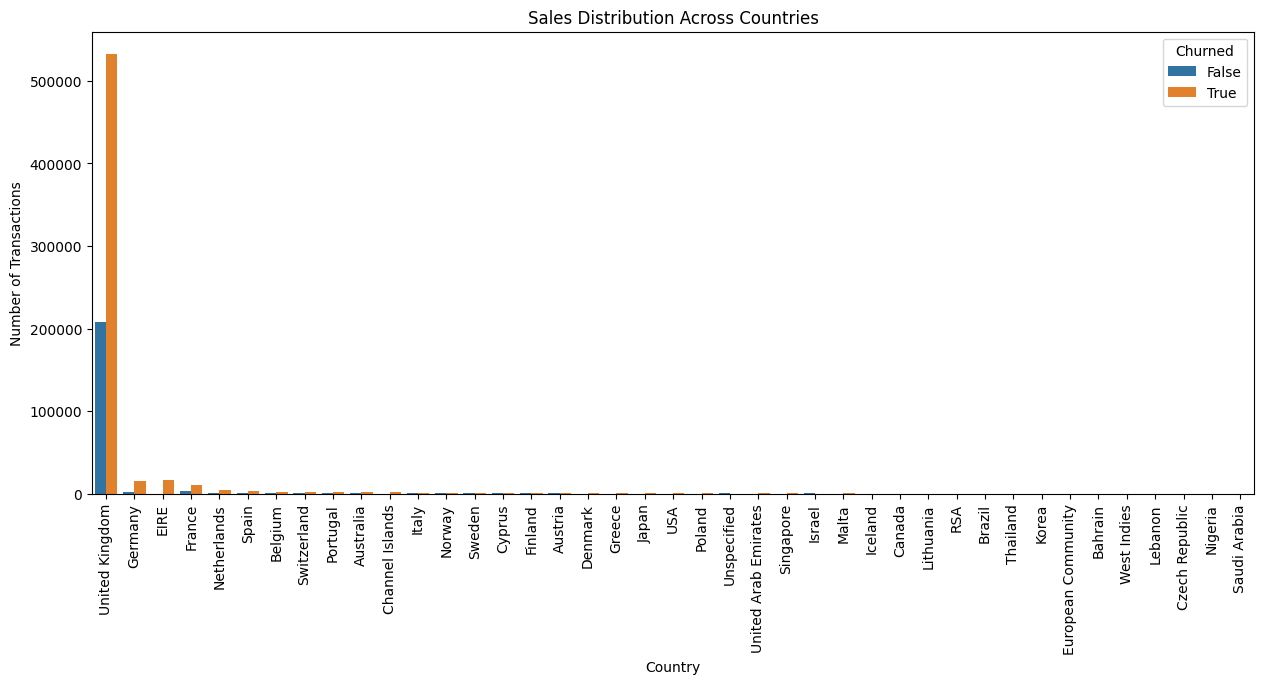

In [55]:
# Visualize sales distribution across countries
plt.figure(figsize=(15, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, hue='Churned')
plt.title('Sales Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Churned', loc='upper right')
plt.show()

Key Insights:

- Churn Occurs Across All Countries: Churned customers are present in every country, indicating that churn is not isolated to specific regions.
- United Kingdom Has Highest Churn: The UK has the highest number of transactions overall, but also the highest number of churned transactions. This suggests churn is a significant issue in the UK market.
- Churn Rates Vary: Churn rates appear to vary across countries, with some countries having higher proportions of churned customers than others.
- Germany and EIRE Also Notable: Germany and EIRE have the second and third highest number of churned transactions, respectively, indicating potential churn concerns in these markets as well.


Considerations:

- Market Size: Countries with larger customer bases naturally have higher numbers of churned transactions. It's essential to consider churn rates relative to customer numbers.
- Data Accuracy: Accuracy of churn data depends on how it's defined and collected.
- External Factors: Churn rates might be influenced by factors specific to each country, such as economic conditions, local competition, or cultural preferences.

## Apply K-means Clustering for Customer Segmentation:

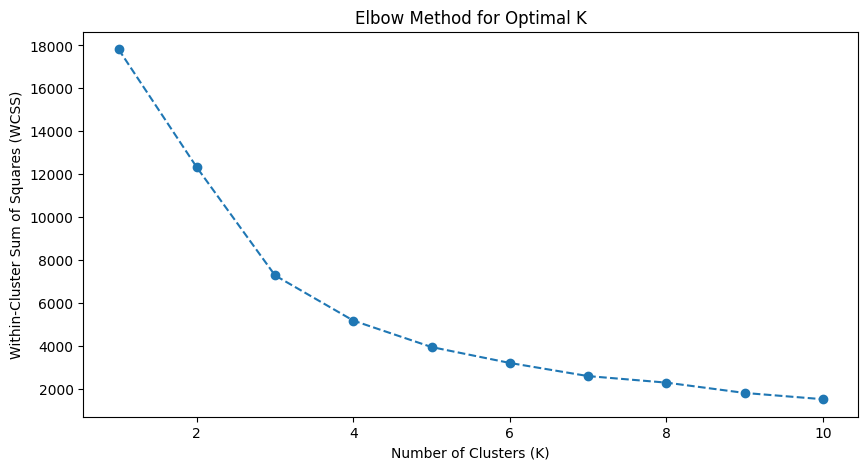

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract RFM values for clustering
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
# Visualize the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**Extract RFM Values for Clustering**:
- rfm_values = rfm_df[['Recency', 'Frequency', 'Monetary']]: Extracts the RFM values from the DataFrame rfm_df for clustering.

**Standardize the Data**:
- scaler = StandardScaler(): Initializes a StandardScaler object for standardizing the data.
- rfm_scaled = scaler.fit_transform(rfm_values): Standardizes the RFM values using the fit_transform method of the StandardScaler object.

**Determine the Optimal Number of Clusters**:
- The code iterates through different numbers of clusters (from 1 to 10) and computes the within-cluster sum of squares (WCSS) for each number of clusters.
- wcss is a list that stores the WCSS values for different numbers of clusters.
- The Elbow Method is used to find the optimal number of clusters, where the plot of WCSS against the number of clusters is inspected for an "elbow point" where the rate of decrease in WCSS slows down.

**Visualize the Elbow Method**:
- The WCSS values for different numbers of clusters are visualized using a line plot.
- The x-axis represents the number of clusters (K), and the y-axis represents the WCSS.
- The plot helps identify the optimal number of clusters by looking for the "elbow point" where the rate of decrease in WCSS slows down significantly.

Key Insights:

- Elbow at K=4: The graph exhibits a distinct "elbow" at K=4, suggesting that 4 clusters likely represent the optimal number of clusters for this dataset.
- Diminishing Returns Beyond K=4: The decrease in WCSS becomes less pronounced after K=4, indicating that adding more clusters doesn't significantly improve the model's fit to the data.
- Balance Between Tightness and Simplicity: Choosing K=4 strikes a balance between creating tight, well-defined clusters and avoiding overcomplicating the model with unnecessary clusters.

Interpretation:

- Clustering RFM Values: The graph suggests that using K-means clustering with 4 clusters would be appropriate for segmenting customers based on their RFM (Recency, Frequency, Monetary) values.
- # Create additional features in df
df['AvgPurchaseValue'] = df['Price']  # Use 'Price' as a proxy for average purchase value
df['TotalQuantityPurchased'] = df['Quantity']
df['TotalNumInvoices'] = 1  # Each row represents one invoice

# Aggregate features at the customer level
additional_features = df.groupby('Customer ID').agg({
    'AvgPurchaseValue': 'mean',
    'TotalQuantityPurchased': 'sum',
    'TotalNumInvoices': 'sum'
}).reset_index()

# Merge RFM features with additional features
merged_df = pd.merge(rfm_df, additional_features, on='Customer ID', how='left')

# Fill missing values with zeros
merged_df.fillna(0, inplace=True)

# Create the target variable 'Churned'
# Assume NaN means not churned and fill missing values with 0
df['Churned'] = df['Churned'].fillna(0)

# Display the updated DataFrame
print(merged_df.head())Optimal Segmentation: This segmentation would divide customers into 4 distinct groups with similar RFM characteristics, enabling targeted marketing strategies and personalized offers.


## Predictive Modeling for Churn

In [58]:
# Create additional features in df
df['AvgPurchaseValue'] = df['Price']  # Use 'Price' as a proxy for average purchase value
df['TotalQuantityPurchased'] = df['Quantity']
df['TotalNumInvoices'] = 1  # Each row represents one invoice

# Aggregate features at the customer level
additional_features = df.groupby('Customer ID').agg({
    'AvgPurchaseValue': 'mean',
    'TotalQuantityPurchased': 'sum',
    'TotalNumInvoices': 'sum'
}).reset_index()

# Merge RFM features with additional features
merged_df = pd.merge(rfm_df, additional_features, on='Customer ID', how='left')

# Fill missing values with zeros
merged_df.fillna(0, inplace=True)

# Create the target variable 'Churned'
# Assume NaN means not churned and fill missing values with 0
df['Churned'] = df['Churned'].fillna(0)

# Display the updated DataFrame
print(merged_df.head())

   Customer ID         InvoiceDate  Frequency  Monetary  Recency  \
0      12346.0 2011-01-18 10:17:00         17    -64.68      325   
1      12347.0 2011-12-07 15:52:00          8   5633.32        1   
2      12348.0 2011-09-25 13:13:00          5   2019.40       74   
3      12349.0 2011-11-21 09:51:00          5   4404.54       18   
4      12350.0 2011-02-02 16:01:00          1    334.40      309   

   AvgPurchaseValue  TotalQuantityPurchased  TotalNumInvoices  
0         12.092500                      52                48  
1          2.546087                    3286               253  
2          3.786275                    2714                51  
3          8.358833                    1619               180  
4          3.841176                     197                17  


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume NaN means not churned and fill missing values with 0
df['Churned'] = df['Churned'].fillna(0)

# Create additional features in df
df['AvgPurchaseValue'] = df['Price']  # Use 'Price' as a proxy for average purchase value
df['TotalQuantityPurchased'] = df['Quantity']
df['TotalNumInvoices'] = 1  # Each row represents one invoice

# Aggregate features at the customer level
additional_features = df.groupby('Customer ID').agg({
    'AvgPurchaseValue': 'mean',
    'TotalQuantityPurchased': 'sum',
    'TotalNumInvoices': 'sum',
    'Churned': 'max'  # Use max to capture any instance of churn within the customer's history
}).reset_index()

# Merge RFM features with additional features
merged_df = pd.merge(rfm_df, additional_features, on='Customer ID', how='left')

# Fill missing values with zeros
merged_df.fillna(0, inplace=True)

# Define features (X) and target variable (y)
X = merged_df.drop(['Customer ID', 'InvoiceDate', 'Churned'], axis=1)
y = merged_df['Churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8259041211101766

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.86      0.85       686
        True       0.80      0.78      0.79       503

    accuracy                           0.83      1189
   macro avg       0.82      0.82      0.82      1189
weighted avg       0.83      0.83      0.83      1189


Confusion Matrix:
 [[588  98]
 [109 394]]
